# Linear Regression In python

The term regression refers to relationship between variables. And these relationship helps to predict the outcome depending on the other results or outcomes. As said, regression searches relation between the variables. So, In this task, I am using data-sets of 'Life Expectancy Data'.
Also, In this task, We will first understand the data sets as it is necessary to understand what type of data sets are there. Then, We will perform various analyses using visualization techniques. We will perform data cleaning and check the accuracy of the predicted value.

# Dataset Description

In this project, I have used 'Life Expectancy Data' dataset downloaded from kaggle. These dataset are collected from WHO and United Nations website.
The dataset can be found at this url:
https://www.kaggle.com/kumarajarshi/life-expectancy-who


# 1. Importing necessary packages for the Analysis:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math
from sklearn import linear_model
%matplotlib inline

#2.  Importing Warnings


In [ ]:
import warnings
warnings.filterwarnings('ignore')

#3. Loading the Dataset:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Life Expectancy Data.csv to Life Expectancy Data.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Life Expectancy Data.csv']))

In [ ]:
#Getting a Brief Look at the Data:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Looks like huge dataset with over 20 features. Its almost not possible to get insight from this dataset by just loading its head. Lets read the info and check for its total number of observations and examine it whether it has null values or not.

In [ ]:
data.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


#4. Data Description

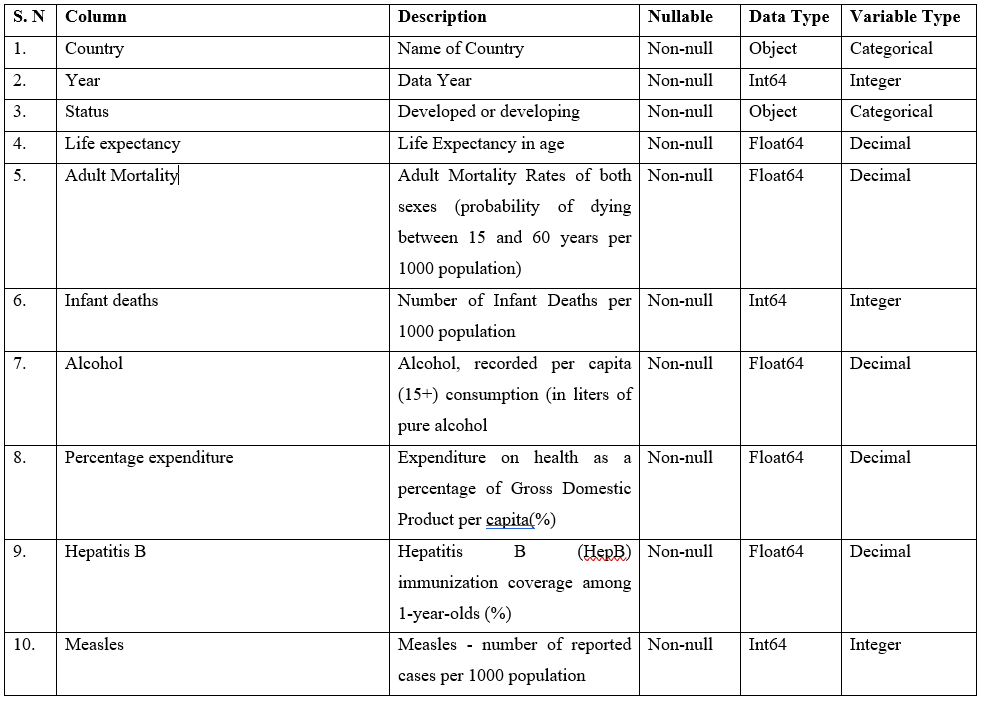

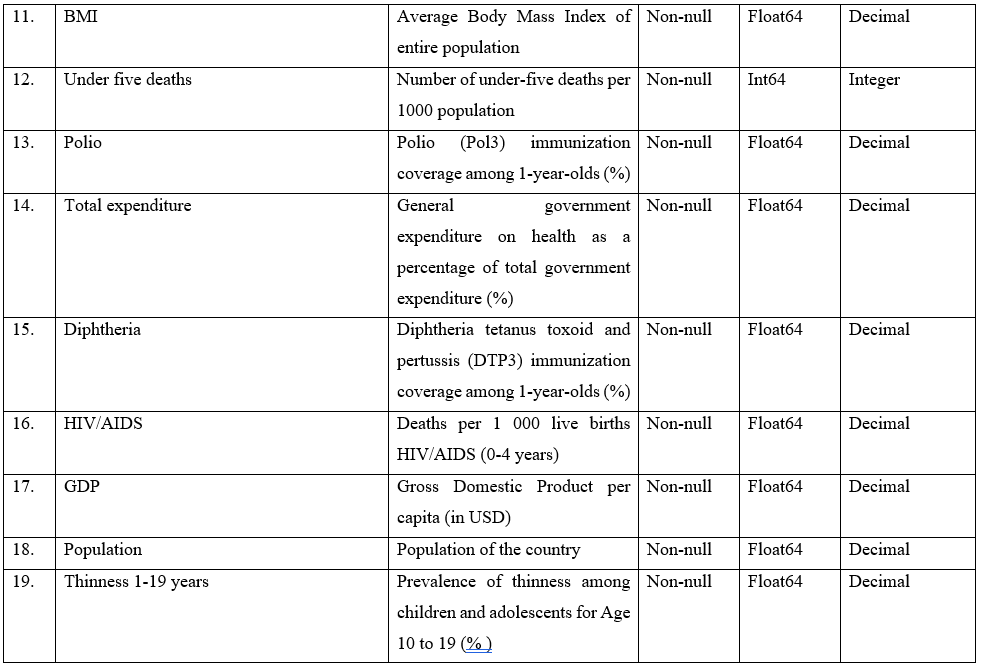

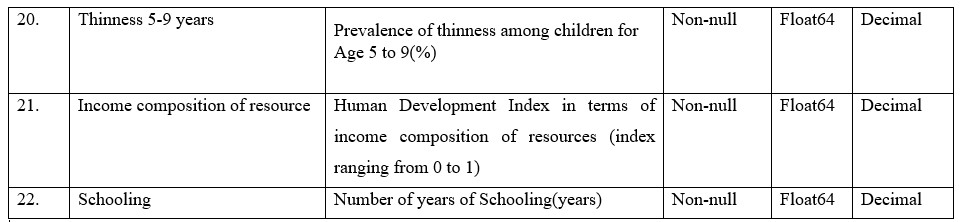

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

It has 22 columns and nearly 3000 entries and with the inequality in no. of observations from each feature it is clear that it has got some null values. Lets try to fix them up and try to solve the problem.

It has 20 Quantitative and 2 Qualitative features.

In [ ]:
#Checking missing values in the datset
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

#5. Data Cleaning

The act of discovering and correcting damaged or inaccurate data from a table or database by identifying missing, improper, or irrelevant elements of the data and then replacing, modifying, or removing the poor data is known as data cleaning.

In [ ]:
data.columns=['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness', 'thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling']

In [ ]:
#____________________________________________PREPROCESS(Clean) DATA____________________________________________

#REMOVE all NaN
data.dropna(subset = ["Country","Year","Status","Life_expectancy","Adult_Mortality"
                       ,"infant_deaths","Alcohol","percentage_expenditure","Hepatitis_B","Measles"
                       ,"BMI","under_five_deaths","Polio","Total_expenditure","Diphtheria"
                       ,"HIV/AIDS","GDP","Population","thinness","thinness_5-9_years"
                       ,"Income_composition_of_resources","Schooling"], inplace=True)

In [ ]:
#Change Stats from Developing/Developed to 0/1
a = 0
tempStatus = []
for i in data.Status:
    if i == "Developing":
        tempStatus.append(0) 
        a = a+1
    elif i == "Developed":
        tempStatus.append(1)
        a = a+1

data.Status = tempStatus

In [ ]:
#To see our dataset after formating
print('Dataset after clearning:')
print('')
data


Dataset after clearning:



,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness                           0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

#6. Data Analysis:

#### Countries Vs Life Expectancy:

In [ ]:
print("Top 10 Countries with Most Life Expectancy")
print("="*50)
print(data.groupby("Country").Life_expectancy.mean().sort_values(ascending =False).head(10))
print("="*50)
print("Top 10 Countries with Least Life Expectancy")
print("="*50)
print(data.groupby("Country").Life_expectancy.mean().sort_values(ascending =True).head(10))
print("="*50)
print(data.groupby("Country").Life_expectancy.median().sort_values(ascending =False).head(10))

Top 10 Countries with Most Life Expectancy
Country
Ireland        83.440000
Canada         82.233333
France         82.206667
Italy          82.153333
Spain          82.020000
Australia      81.907143
Sweden         81.900000
Austria        81.480000
Netherlands    81.325000
Greece         81.233333
Name: Life_expectancy, dtype: float64
Top 10 Countries with Least Life Expectancy
Country
Sierra Leone                48.425000
Lesotho                     48.608333
Zimbabwe                    49.386667
Malawi                      50.261538
Angola                      50.675000
Swaziland                   50.820000
Central African Republic    51.416667
Chad                        52.285714
Nigeria                     52.840000
Mozambique                  53.407143
Name: Life_expectancy, dtype: float64
Country
Ireland        84.00
Sweden         81.80
Australia      81.80
Spain          81.60
Italy          81.60
Canada         81.55
Israel         81.50
France         81.50
Netherlands    

The above data shows the data of countries with most life expectancy and with least life expectancy.

#### Countries Vs Life Expectancy on the basis of Status:

In [ ]:
data.groupby("Status").Life_expectancy.mean()

Status
0    67.687349
1    78.691736
Name: Life_expectancy, dtype: float64

The above group shows the mean value of life expectency according to the status of the country. "1" denotes the developed countries which has an average life expectancy of 78 years, whereas "0" denotes the developing countries which has an average life expectancy of 67 years.

#### Countries Vs Population:

In [1]:
print("="*50)
print("Top 10 Countries with Most Population")
print("="*50)
print(data.groupby("Country").Population.mean().sort_values(ascending =False).head(10))
print("="*50)
print("Top 10 Countries with Least Population")
print("="*50)
print(data.groupby("Country").Population.mean().sort_values(ascending =True).head(10))

Top 10 Countries with Most Population


NameError: ignored

The above data analysis presents trhe relationship between countries and their population. This data shows the counties with highest population and counties with lowest population.

#### Countries Vs GDP:

In [ ]:
print("="*50)
print("Top 10 Countries with Highest GDP")
print("="*50)
print(data.groupby("Country").GDP.mean().sort_values(ascending =False).head(10))
print("="*50)
print("Top 10 Countries with Lowest GDP")
print("="*50)
print(data.groupby("Country").GDP.mean().sort_values(ascending =True).head(10))

Top 10 Countries with Highest GDP
Country
Luxembourg     56727.492103
Netherlands    39640.341955
Australia      35391.195154
Austria        33171.578263
Sweden         32232.377078
Ireland        32225.113914
Canada         29568.930782
France         25794.803399
Germany        23215.140268
Italy          22627.158025
Name: GDP, dtype: float64
Top 10 Countries with Lowest GDP
Country
Haiti                 82.190242
Burundi              151.485431
Equatorial Guinea    192.597330
Senegal              198.571244
Malawi               241.337392
Sierra Leone         250.325831
Eritrea              286.940811
Guinea               311.268858
Niger                319.388894
Liberia              328.764246
Name: GDP, dtype: float64


The above data analysis shows the relationship between countries and the GDP. And this shows the lis of countries with highest and lowest GDP

### Here is the list of features that we are going to impute with other features: 

**Impute 'Adult_Mortality' feature with 'Life expactancy' feature.**

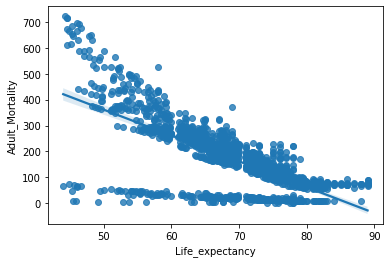

In [ ]:
sns.regplot(x="Life_expectancy",y = 'Adult_Mortality',data = data,scatter= True, fit_reg=True)

A somewhat linear relationship with negative correlation, which is true, as the adult mortality increases, the less life expectancy it has.

**Impute 'BMI' feature with 'Life expectancy' feature.**

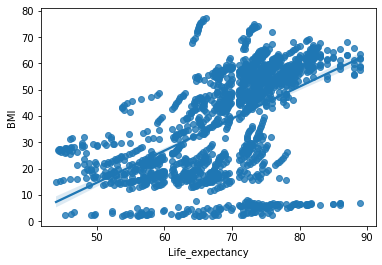

In [ ]:
sns.regplot(x="Life_expectancy",y = 'BMI',data = data,scatter= True, fit_reg=True)

This linear relationship is a positive corelation, which means that, when the BMI increases or seems high, the life expectancy also moves towards positive direction

**Impute 'Schooling' feature with 'Life expactancy' feature.**

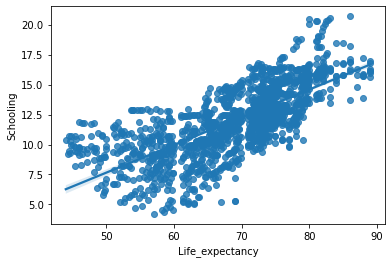

In [ ]:
sns.regplot(x="Life_expectancy",y = 'Schooling',data = data,scatter= True, fit_reg=True)

This linear relationship is a positive corelation, which means that, when the Schooling increases or seems high, the life expectancy also moves towards positive direction

**Impute 'Income_composition_of_resources' feature with 'Life expactancy' feature.**

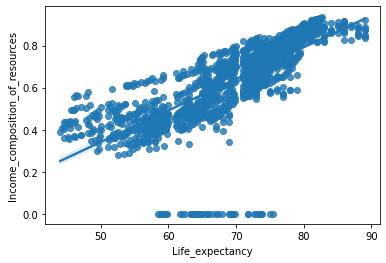

In [ ]:
sns.regplot(x="Life_expectancy",y = 'Income_composition_of_resources',data = data,scatter= True, fit_reg=True)

This linear relationship is a positive corelation, which means that, when the Income composition of resourse increases or seems high, the life expectancy is high.

**Impute 'HIV/AIDS' feature with 'Life expactancy' feature.**

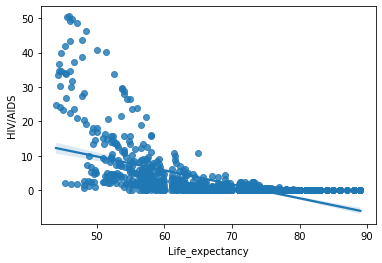

In [ ]:
sns.regplot(x="Life_expectancy",y = 'HIV/AIDS',data = data,scatter= True, fit_reg=True)

This linear relationship is a negative corelation, which means that, when the HIV/AIDS decreases or seems high, the life expectancy moves towards positive direction

Now, 
As we are predicting Life Expectancy our 'Target'(y) variable will be 'Life expectancy'. And remaining attributes would be considered as X or Predictors.

Let us check our Target Variable, also its distribution.

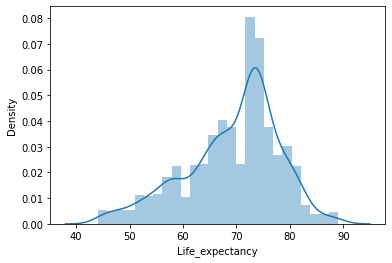

In [ ]:
sns.distplot(data['Life_expectancy']);

It almost have a normal distribution with negative skew.

#7. Prediction & Accuracy

We'll split the train and test data and create the model

In [ ]:
#____________________________________________Spliting data____________________________________________

#****Set TEST****
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[[
    'Status','Adult_Mortality','infant_deaths','percentage_expenditure','Measles','BMI'
    ,'under_five_deaths','Total_expenditure','HIV/AIDS','GDP','Income_composition_of_resources'
                                ,'Schooling']], data.Life_expectancy, test_size=0.15, random_state=32)


Lets solve this problem by using Linear Regression and see what it gives us.

In [ ]:
#****Set Train****
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
#____________________________________________SEE THE ACCURACY SCORE____________________________________________
print('This is regression accuracy score:')
reg.score(X_test, y_test)

This is regression accuracy score:


0.8455408689701087

Linear Regration of Input Data vs Life Expectancy:



<function matplotlib.pyplot.show>

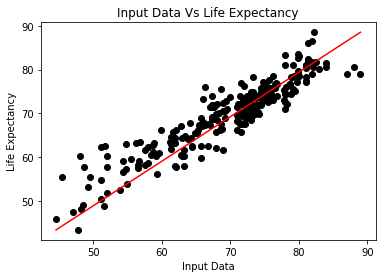

In [ ]:
#____________________________________________Display Data in Linear Regression____________________________________________
prediction_of_test = reg.predict(X_test)

%matplotlib inline

plt.scatter(y_test, prediction_of_test, color='black')

x0 = min(y_test)
x1 = max(y_test)
y0 = min(prediction_of_test)
y1 = max(prediction_of_test)
plt.plot([x0,x1],[y0,y1],color="red")

plt.xlabel("Input Data")
plt.ylabel("Life Expectancy")
plt.title("Input Data Vs Life Expectancy")

print('Linear Regration of Input Data vs Life Expectancy:')
print('')
plt.show

Looks like we have got our predictions, lets have a look at our predictions.

In [ ]:
#First 10 test data
print("The first 10 test data are: \n", y_test[0:10])

print("\n")

# First 10 predictions
print("The pridiction of first 10 test data are \n")
prediction_of_test[0:10]


The first 10 test data are: 
 1077    58.4
561     75.8
1379    66.1
49      51.7
2363    68.8
1637    81.0
1587    74.8
1308    73.5
1141    74.1
1720    67.3
Name: Life_expectancy, dtype: float64


The pridiction of first 10 test data are 



array([60.57882274, 74.63671527, 73.25161427, 62.58273083, 66.50303039,
       77.40638595, 73.15137887, 70.37574565, 70.34337292, 71.96488674])

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_of_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction_of_test))

Mean Absolute Error: 2.7680147987739927
Mean Squared Error: 12.787620401868613


Looks good but we do need some metrics to evaluate our model. In this Regression tasks nothing better than using RMSE. Lets Examine our model using RMSE.

In [ ]:
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error:',mean_squared_error(y_test,prediction_of_test)**(0.5))

Root Mean Squared Error: 3.575978244042966


The Root Mean Square Error (RMSE) is a typical method of calculating a model's error in predicting quantitative data. Its formal definition is as follows:
Mathematically:
\begin{align}
        \mathbf{RMSE}  = \sqrt{\sum_{i=1}^n (1/m (\hat(y_i) - y_i)^2)}
    \end{align}


where, 
^(y_i) is the predicted value ,  (y_i) ^2 is the observed value & m is the number of observation


In [ ]:
from sklearn.metrics import r2_score
print('r2 score is:',r2_score(y_test,prediction_of_test))

r2 score is: 0.8455408689701087


Now, lets see the prediction of Life expectancy on the basis of our Input datas. The Input data includes: 

Status  ,  Adult_Mortality  , infant_deaths ,  percentage_expenditure  ,   Measles ,  BMI ,  under_five_deaths ,  Total_expenditure ,  HIV/AIDS ,  GDP ,   Income_composition_of_resources ,  Schooling

In [ ]:
#____________________________________________Try Predict 01_____________________________________________
print('Prediction of life expectancy:')
reg.predict([[0,263,62,71.27962,1154,19.1,83,8.16,0.1,584.2592,0.479,10.1]])

Prediction of life expectancy:


array([64.4449955])

In [ ]:
#____________________________________________Try Predict 02____________________________________________
print('Prediction of life expectancy:')
reg.predict([[0,281,77,56.76221682,2861,16.2,106,9.42,0.1,445.8932979,0.434,8.9]])

Prediction of life expectancy:


array([62.36698366])

In [ ]:
#____________________________________________Try Predict 03____________________________________________
print('Prediction of life expectancy:')
reg.predict([[0,295,87,11.08905273,798,13.4,122,8.82,0.1,198.7285436,0.373,6.5]])

Prediction of life expectancy:


array([59.01034217])

#8. Conclusion
I used linear regression to make some predictions, which gave me accurate-but not great-model due to some neglection on linear regression assumptions. In the future, I may be able to enhance my model by pre-processing the data to match the linear regression assumption, as well as applying a more advanced machine learning approach.